# Explorando detecção de borda com imagens rotacionadas

## Importando bibliotecas

In [1]:
import numpy as np
import seaborn as sns

from zipfile import ZipFile
from matplotlib import pyplot as plt
from scipy.stats import mode
from skimage.io import imread
from skimage.feature import canny
from skimage.filters import threshold_otsu
from skimage.transform import hough_line, hough_line_peaks, rotate

sns.set_style(style='darkgrid')
plt.gray()


def findTiltAngle(image_edges:np.ndarray) -> float:
  h, theta, d = hough_line(image_edges)
  accum, angles, dists = hough_line_peaks(h, theta, d)
  angle = np.rad2deg(mode(angles)[0][0])

  return angle + 90 if angle < 0 else angle - 90


def rgb_to_blue(img:np.ndarray) -> np.ndarray:
  height, width, _ = img.shape
  blue_img = np.zeros(shape=(height, width))

  for i in range(height):
    for j in range(width):
      blue_img[i, j] = img[i, j, 2]
  
  return blue_img

<Figure size 432x288 with 0 Axes>

In [2]:
path_list = []
with ZipFile('./toras.zip') as zip_file:
  for path in zip_file.namelist():
    if '__MAC' not in path \
        and '.JPG' in path:
      path_list.append(f'./toras.zip/{path}')

## Explorando soma dos píxels (vertical e horizontal) em escala de cinza

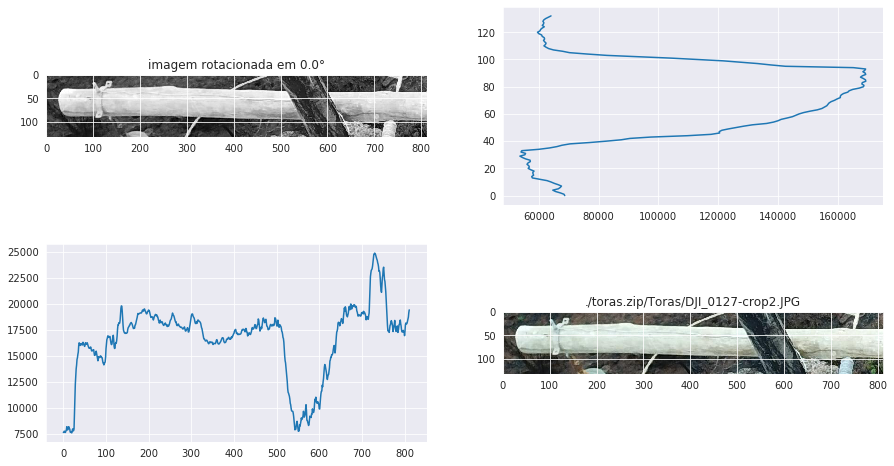

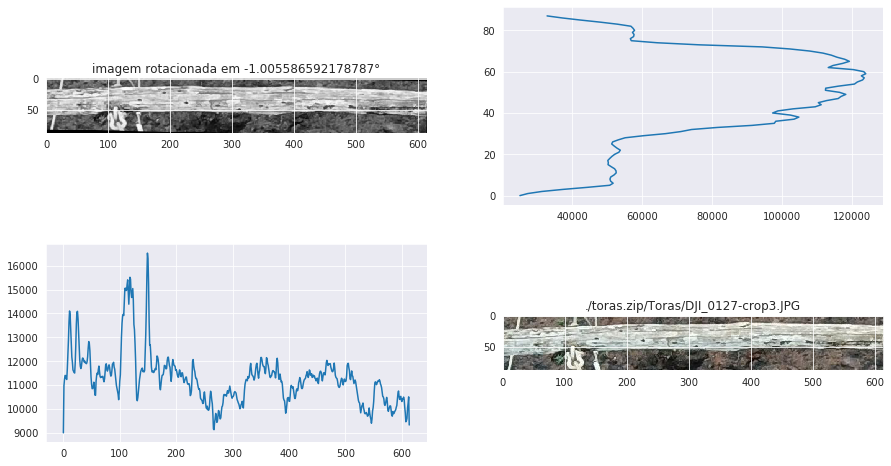

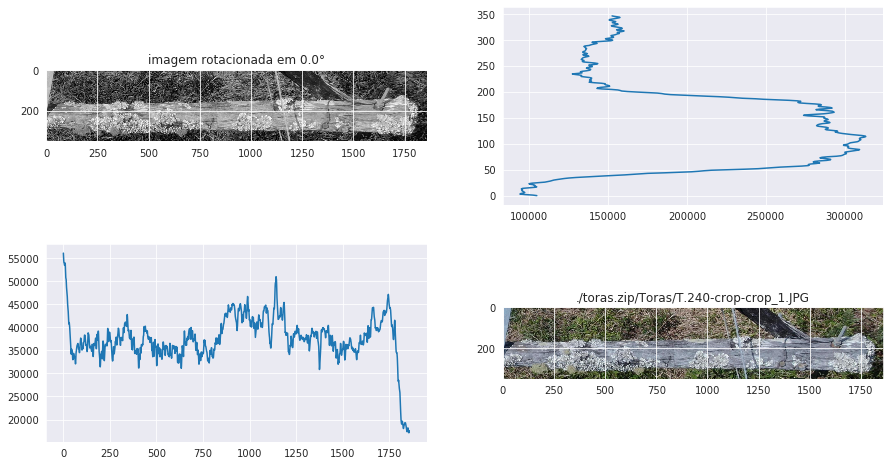

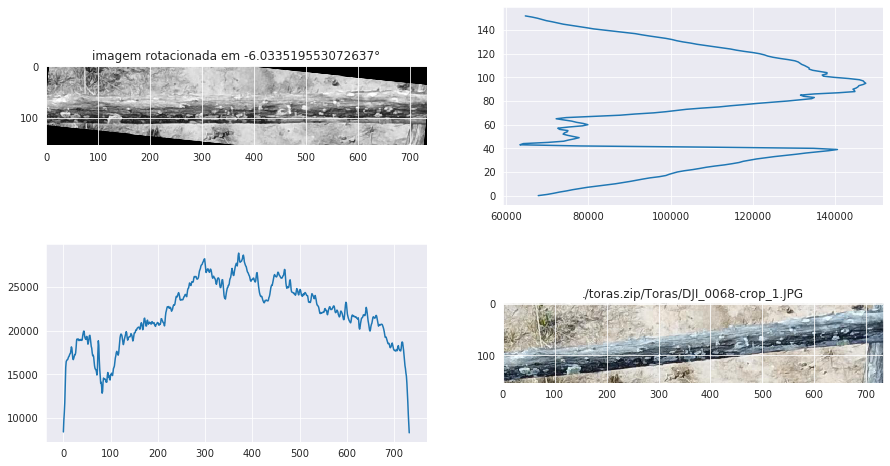

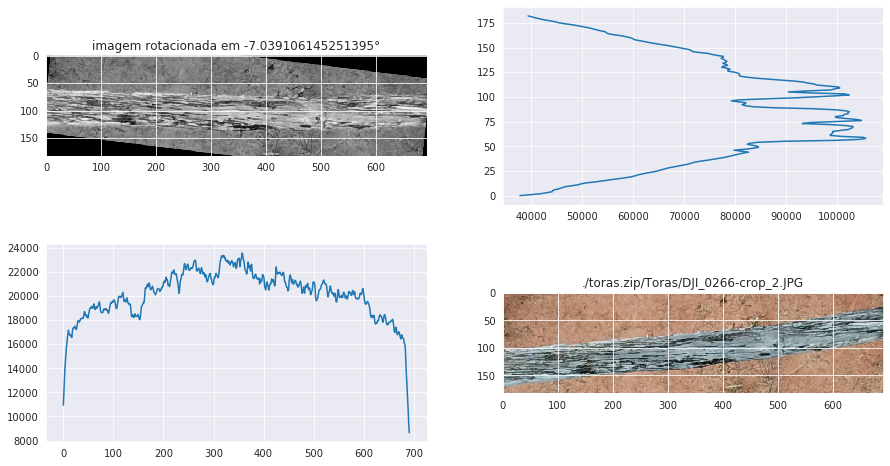

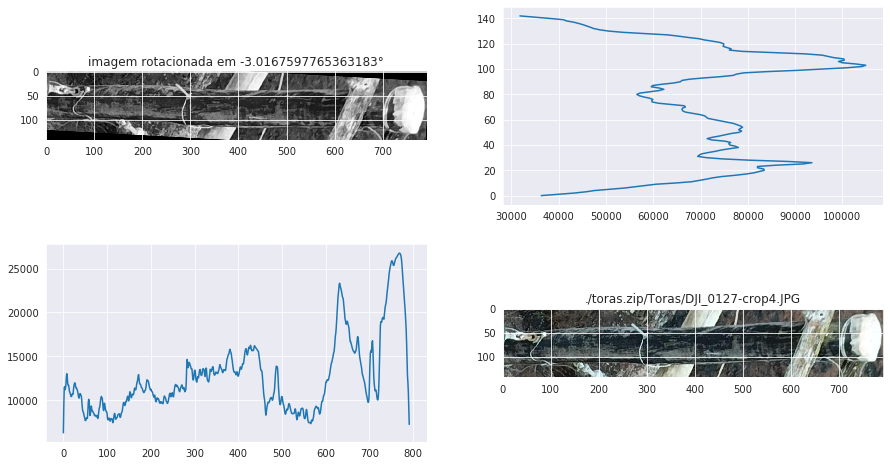

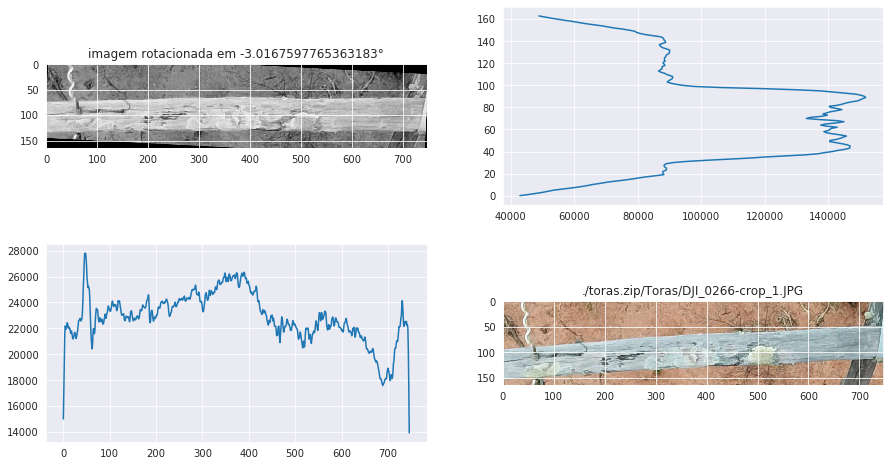

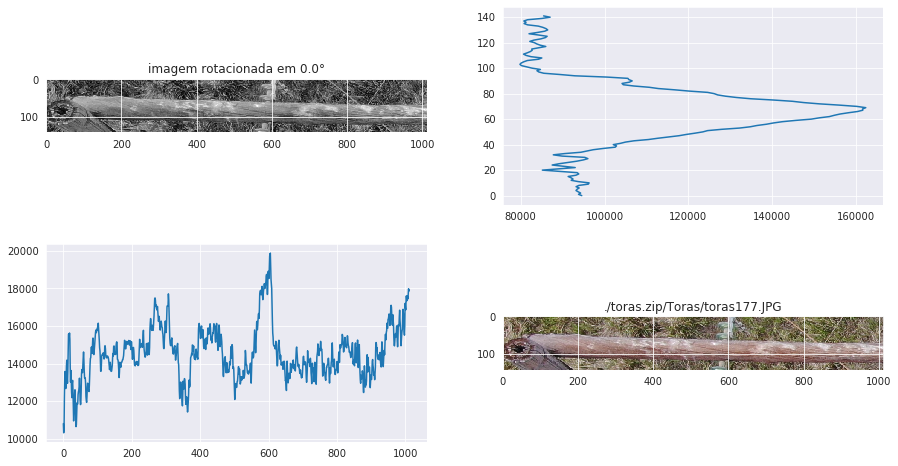

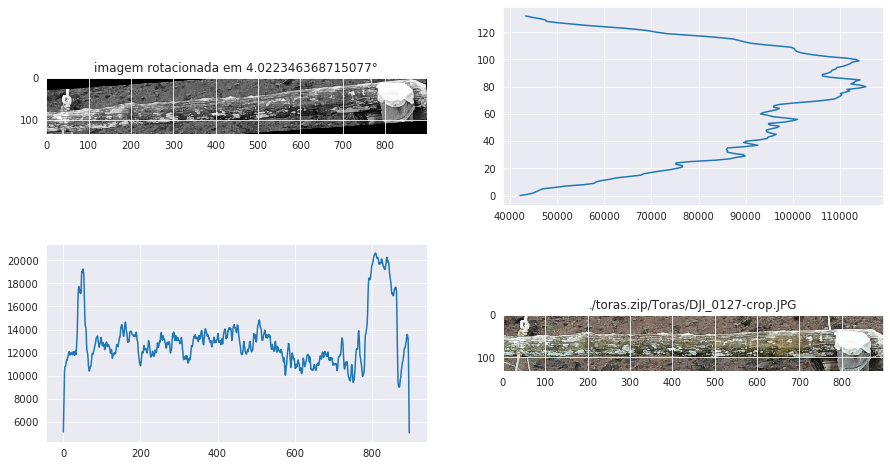

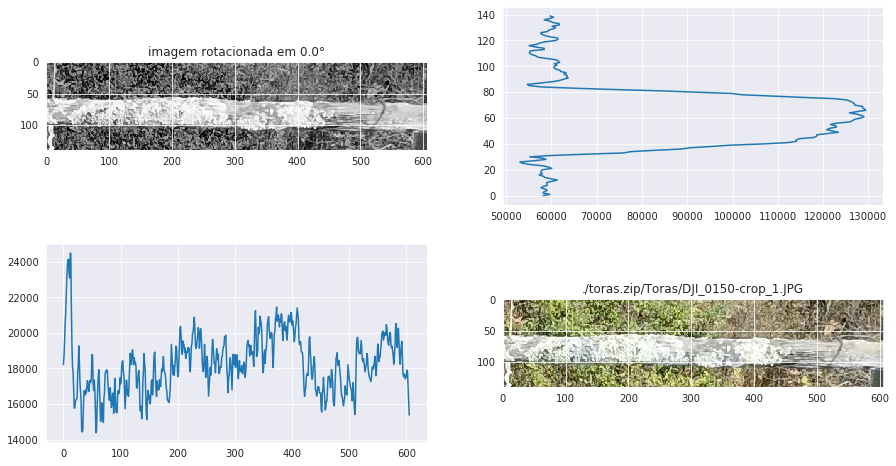

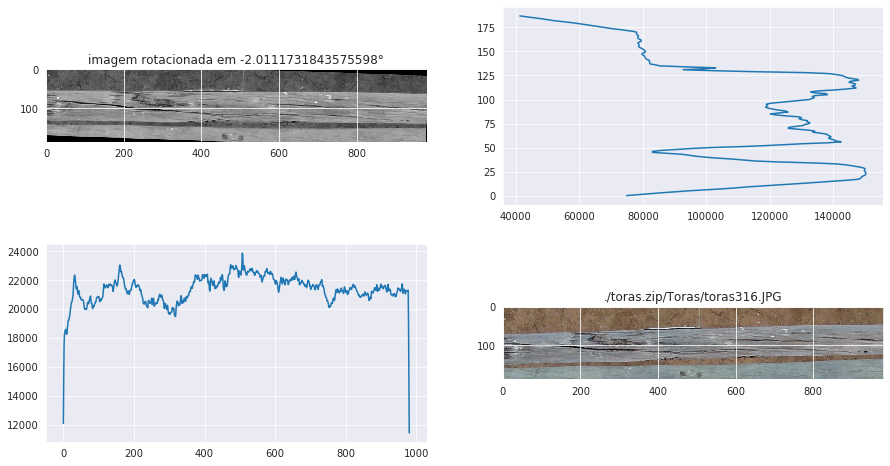

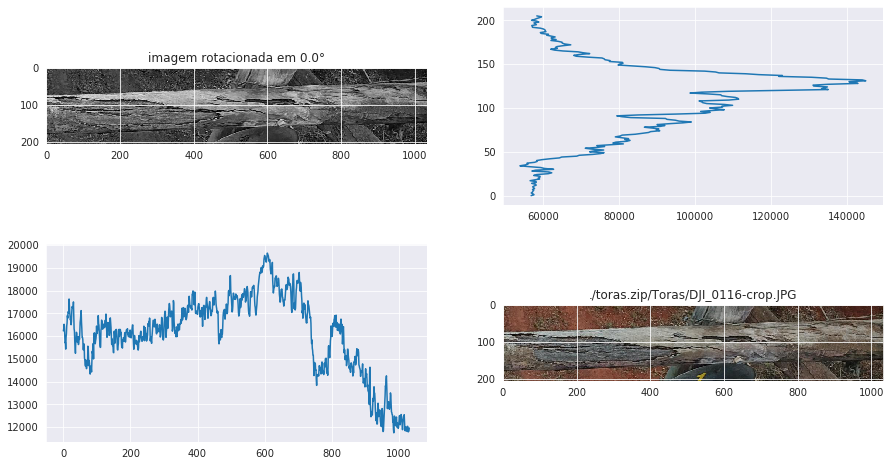

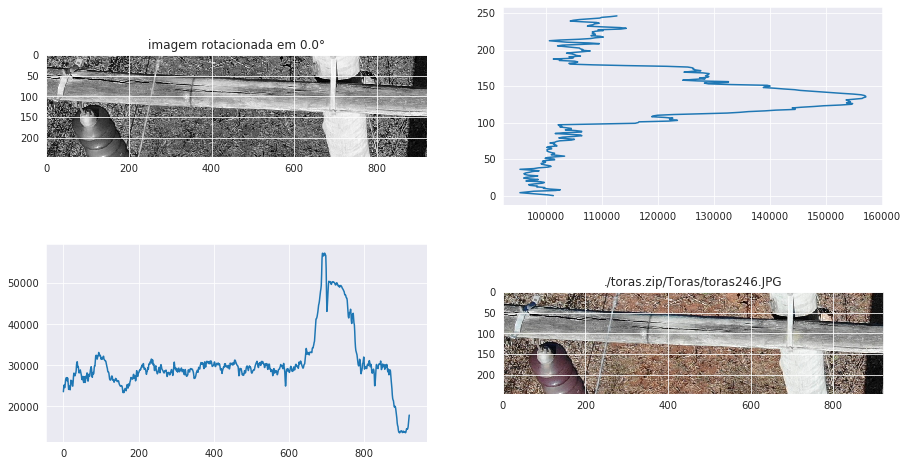

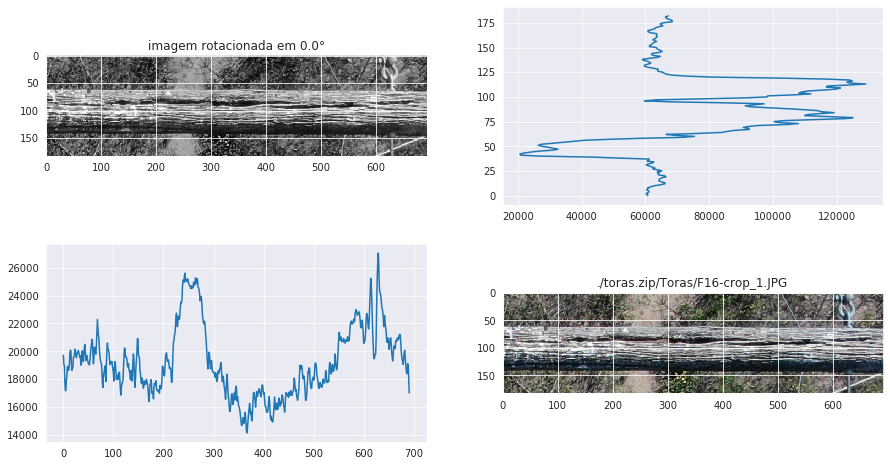

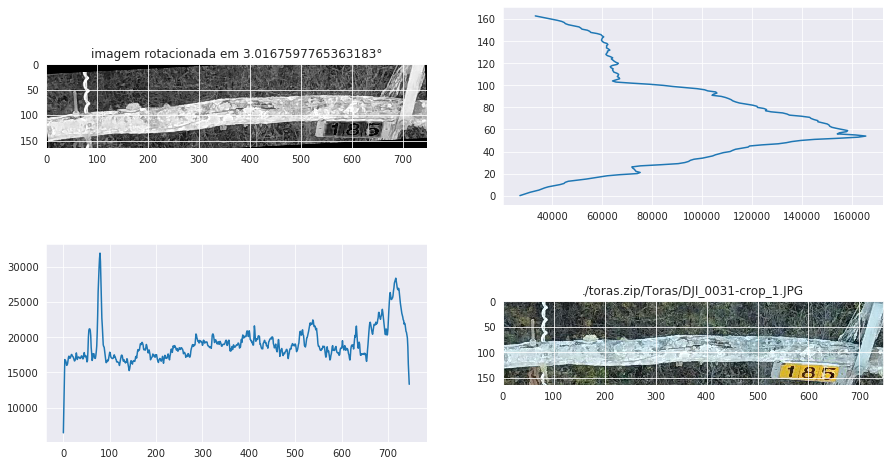

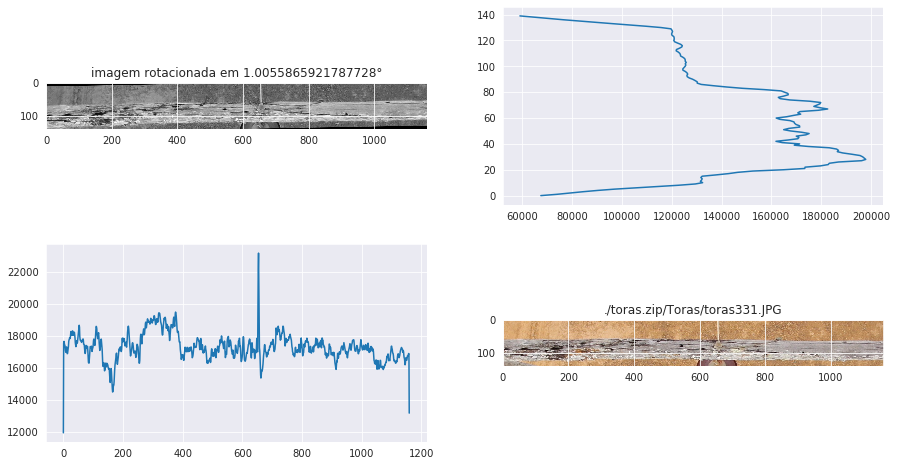

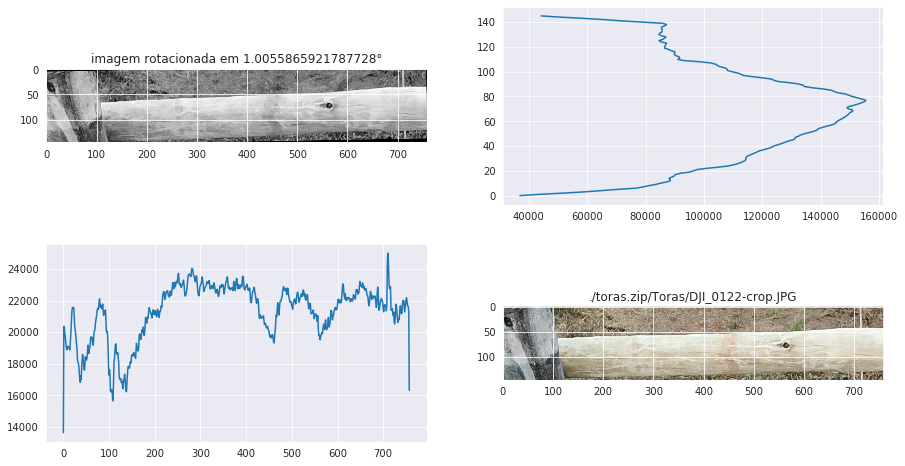

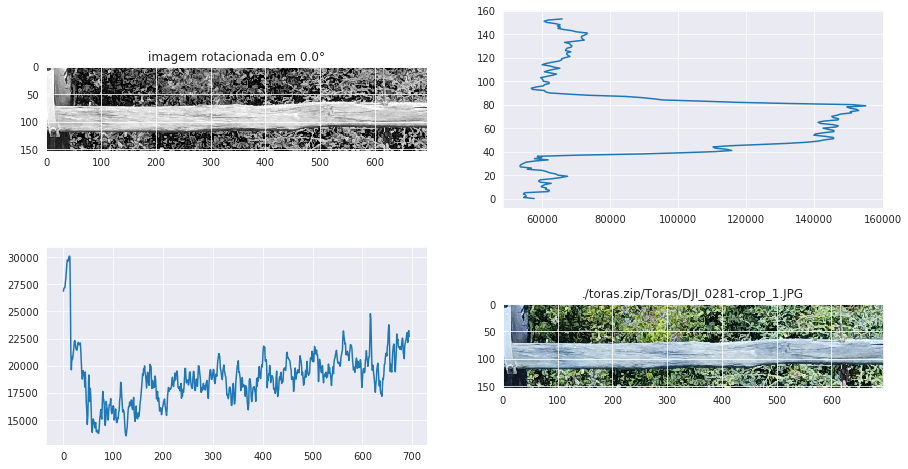

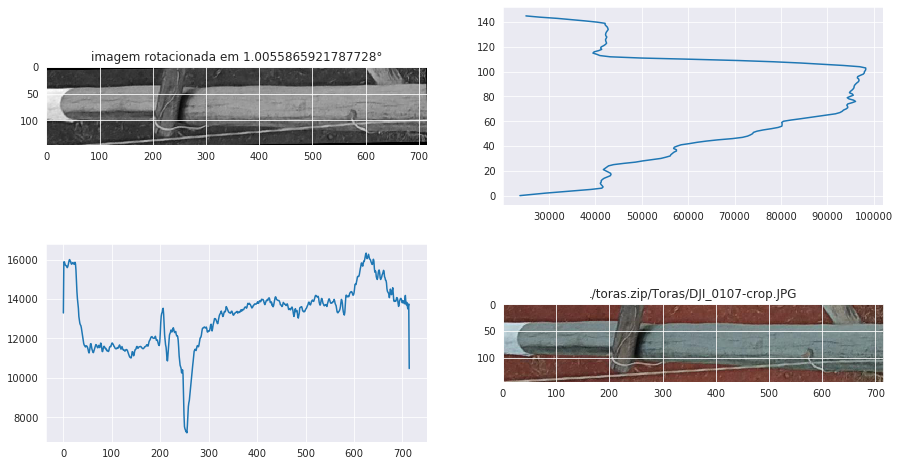

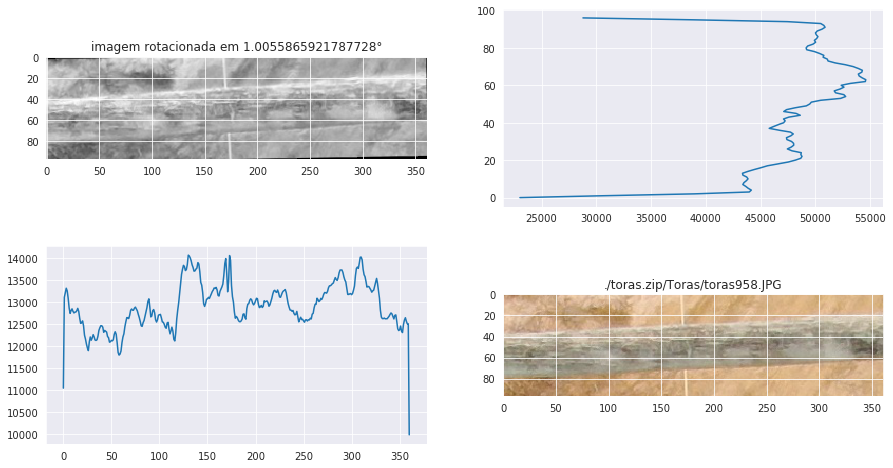

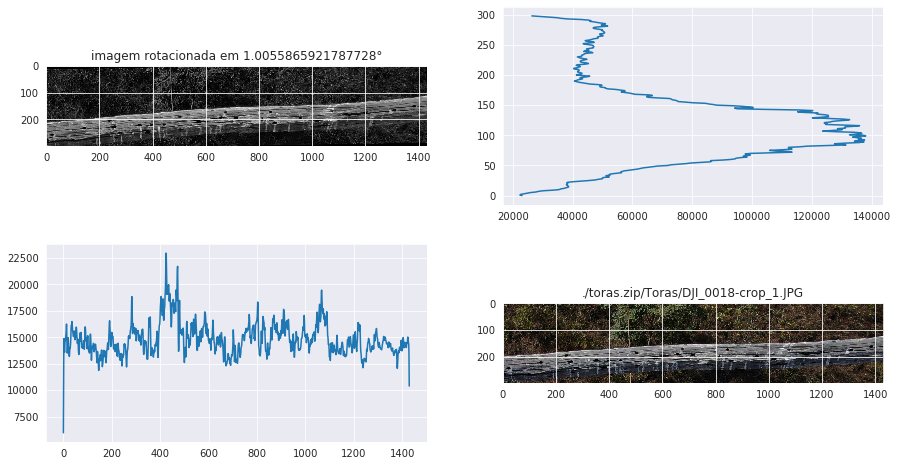

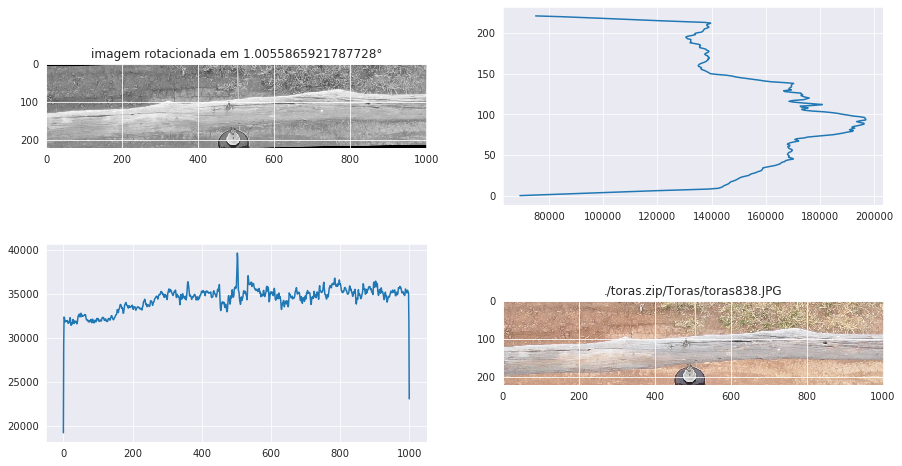

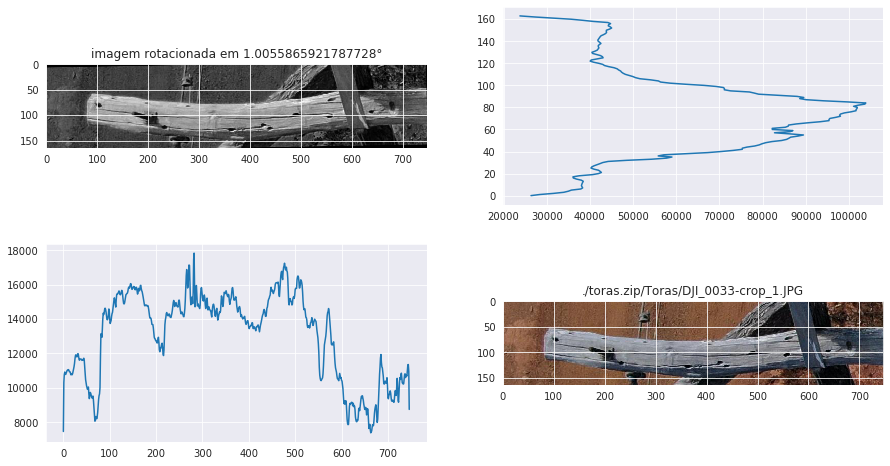

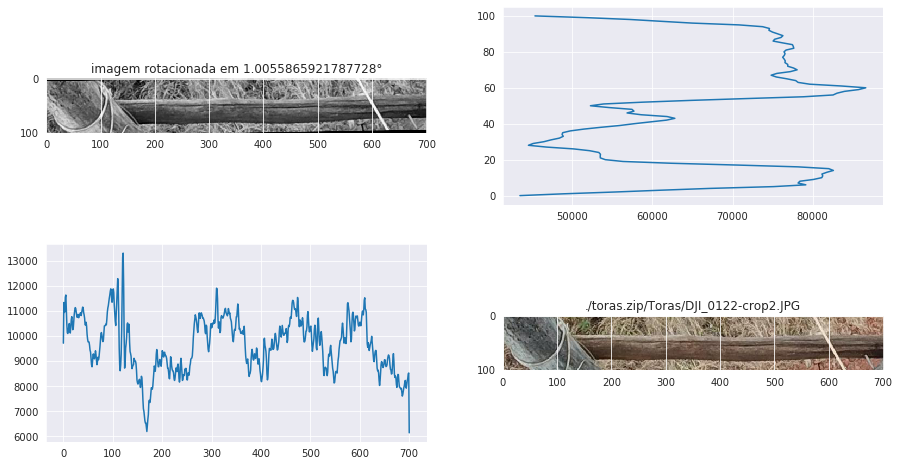

In [3]:
for path in path_list:
  # lendo imagem RGB
  img = imread(path)

  # convertendo para o canal azul apenas
  blue_img = rgb_to_blue(img)

  # binarizando com otsu
  img_ostu = blue_img >= threshold_otsu(blue_img)

  # encontrando bordas
  edges = canny(img_ostu)

  # Rotacionando imagem
  angle = findTiltAngle(edges)
  new_img = rotate(blue_img, angle)
  
  h, w = blue_img.shape

  soma_vertical = new_img.sum(axis=0)
  soma_horizontal = new_img.sum(axis=1)

  # Plotando imagens
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
  ax[0, 0].title.set_text(f'imagem rotacionada em {angle}°')
  ax[0, 0].imshow(new_img)

  ax[0, 1].plot(soma_horizontal, range(h-1, -1, -1))

  ax[1, 0].plot(range(w), soma_vertical)

  ax[1, 1].title.set_text(path)
  ax[1, 1].imshow(img)

  plt.show()
